# Accessing info with `qiskit-superstaq`
This tutorial will cover the information you can access on your account and related jobs and backends using `qiskit-superstaq`.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/get_started/access_info/access_info_qss.ipynb) [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/get_started/access_info/access_info_qss.ipynb)

## Imports and API Token

As usual, we'll begin with importing requirements and setting up access to Superstaq. This tutorial uses `qiskit-superstaq`, our Superstaq client for Qiskit. You can install it and relevant dependencies by running `pip install qiskit-superstaq[examples]`.

In [1]:
# Requirements to use qiskit-superstaq
try:
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")
    import qiskit_superstaq as qss

import qiskit

Now, we instantiate a provider in `qiskit-superstaq` with `SuperstaqProvider()`. Supply the Superstaq API token by providing the token as an argument of `qss.SuperstaqProvider()` or setting it as an environment variable (see [this guide](https://superstaq.readthedocs.io/en/latest/get_started/basics/basics_qss.html#Set-up-access-to-Superstaq%E2%80%99s-API)).

In [2]:
provider = qss.SuperstaqProvider()

## Account Information

The `provider` class gives you a means to retrieve information regarding your Superstaq account. Currently, you can use `provider` to retrieve your Superstaq balance.

In [3]:
provider.get_balance()

'875.84 credits'

If are interested in increasing your balance or have more information on your user role, please reach out to us at superstaq@infleqtion.com or join our [Slack workspace](https://join.slack.com/t/superstaq/shared_invite/zt-1wr6eok5j-fMwB7dPEWGG~5S474xGhxw).

## Backend Information
In addition to account information, the ``SuperstaqProvider`` object also gives you a list of all the devices and simulators to which you have access, as well as additional information about those backends.

* `get_targets()`: Retrieves a list of supported Superstaq targets. This method also accepts the following boolean keyword arguments to filter the backends returned: `simulator`, `supports_submit`, `supports_submit_qubo`, `supports_compile`, `available`, `retired`, and `accessible`.
* `backends()`: Retrieves a list of available backends. This method also accepts the same keyword arguments as mentioned above.
* `get_my_targets()`: Retrieves a filtered list of targets that are accessible to the user based on their user role permissions. This method is equivalent to `get_targets(accessible=True)`.
* `get_backend("<backend_name>")`: Select your target backend, where `<backend_name>` is the name of the desired backend
* `get_backend("<backend_name>").target_info()`: Retrieve information on your selected backend, such as number of qubits, native gate set

In [4]:
provider.get_targets()

[Target(target='aqt_keysight_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='aqt_zurich_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='aws_dm1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='aws_sv1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='aws_tn1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='cq_sqale_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False, accessible=True),
 Target(target='eeroq_wonderlake_qpu', supports_submi

In [5]:
backend = provider.get_backend("ibmq_kingston_qpu")  # selecting IBM's Kingston device
backend.target_info()

{'num_qubits': 156,
 'target': 'ibmq_kingston_qpu',
 'coupling_map': [[0, 1],
  [1, 0],
  [1, 2],
  [2, 1],
  [2, 3],
  [3, 2],
  [3, 4],
  [3, 16],
  [4, 3],
  [4, 5],
  [5, 4],
  [5, 6],
  [6, 5],
  [6, 7],
  [7, 6],
  [7, 8],
  [7, 17],
  [8, 7],
  [8, 9],
  [9, 8],
  [9, 10],
  [10, 9],
  [10, 11],
  [11, 10],
  [11, 12],
  [11, 18],
  [12, 11],
  [12, 13],
  [13, 12],
  [13, 14],
  [14, 13],
  [14, 15],
  [15, 14],
  [15, 19],
  [16, 3],
  [16, 23],
  [17, 7],
  [17, 27],
  [18, 11],
  [18, 31],
  [19, 15],
  [19, 35],
  [20, 21],
  [21, 20],
  [21, 22],
  [21, 36],
  [22, 21],
  [22, 23],
  [23, 16],
  [23, 22],
  [23, 24],
  [24, 23],
  [24, 25],
  [25, 24],
  [25, 26],
  [25, 37],
  [26, 25],
  [26, 27],
  [27, 17],
  [27, 26],
  [27, 28],
  [28, 27],
  [28, 29],
  [29, 28],
  [29, 30],
  [29, 38],
  [30, 29],
  [30, 31],
  [31, 18],
  [31, 30],
  [31, 32],
  [32, 31],
  [32, 33],
  [33, 32],
  [33, 34],
  [33, 39],
  [34, 33],
  [34, 35],
  [35, 19],
  [35, 34],
  [36, 21],
  

## Job Information
Jobs submitted through Superstaq contain the following information:

* `job_id()`: Unique identifier for the job.
* `status()`: Overall status of the job (Submitted, Queued, Running, Failed, Cancelled, or Done). Note that an `index` argument can be passed optionally to retreive the status of a specific job indexed by `index` in a batch job. 
* `backend()`: Device the job was run on.
* `result().get_counts()`: Counts from the result of the job run. Note that `result()` can take an `index` argument to retrieve a specific job result (corresponding to the circuit with the same `index`). It also optionally accepts a list of qubit indices to retrieve marginal counts on specific qubits via the `qubit_indices` argument of `result()`.
* `input_circuits()`: Retrieves original (i.e., not compiled) circuit(s) for job. Note this returns a list and you must specify an `index` if you want to retrieve a single/specific circuit.
* `compiled_circuits()`: Retrieves compiled circuit(s) from submitted job. Note this returns a list and you must specify an `index` if you want to retrieve a single/specific circuit.

Note that jobs live in our database for a limited amount of time. Typically, they have a lifespan of 1 year.

In [6]:
# Creating a circuit using Qiskit
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Submitting the circuit to IBM's Kingston QPU
backend = provider.get_backend("ibmq_kingston_qpu")
job = backend.run(
    [qc], method="dry-run", shots=100
)  # Specify "dry-run" as the method to submit & run a Superstaq simulation

In [7]:
job.job_id()

'57103f37-cc05-4b6a-a2d1-5ac96217bc77'

In [8]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [9]:
job.backend()

<SuperstaqBackend('ibmq_kingston_qpu')>

In [10]:
job.result(index=0).get_counts()

{'11': 52, '00': 48}

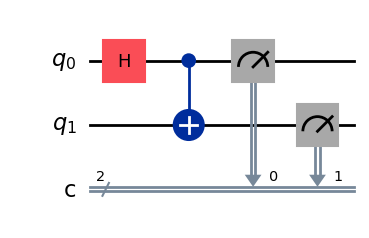

In [11]:
job.input_circuits(index=0).draw(output="mpl")

Additionally, you may cancel the current job (or, optionally, a sub-job by passing an `index` argument) if it is not in a terminal state like so:

In [12]:
job.cancel()

/home/rich/software/super.tech/work/client/qiskit-superstaq/qiskit_superstaq/superstaq_job.py:199: SuperstaqWarning: Job '57103f37-cc05-4b6a-a2d1-5ac96217bc77' cannot be cancelled: it already has status Done
  self._backend._provider._client.cancel_jobs(ids_to_cancel, **kwargs)


Lastly, you may also retrieve the information described above on a previously submitted `qiskit-superstaq` job:

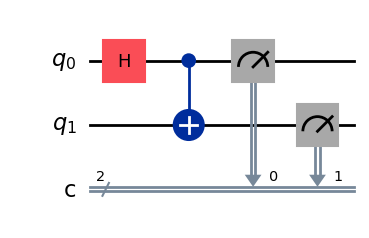

In [13]:
backend = provider.get_backend("ibmq_kingston_qpu")
job_id = job.job_id()  # Here we use the job ID from above, but this can be any old job ID
job_old = provider.get_job(job_id)
job_old.input_circuits(index=0).draw(output="mpl")